# PCA

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

from apyori import apriori

Z.shape =  (569, 2)
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.95


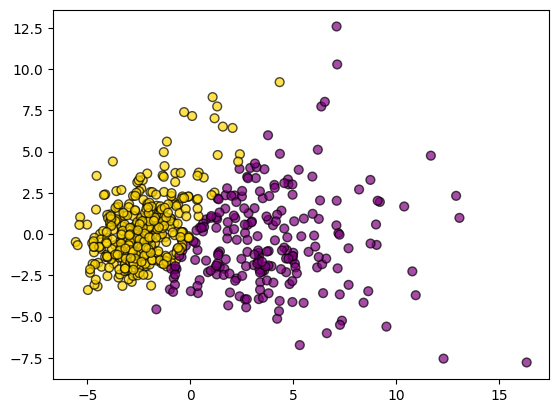

In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
(X_cancer, y_cancer)= load_breast_cancer(return_X_y=True)

scaler = StandardScaler().fit(X_cancer)
X_scaled = scaler.transform(X_cancer)

pca = PCA(n_components=2)
Z= pca.fit_transform(X_scaled)
print ('Z.shape = ',Z.shape)
colors = np.array(['purple','gold'])


# Try logistic regression

from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test =  train_test_split(Z,y_cancer,random_state=0)
clf = LogisticRegression(max_iter= 10000).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
y_predicted = clf.predict(Z)
plt.figure()
plt.scatter(Z[:,0], Z[:,1], s= 40, c=colors[y_predicted],edgecolors='black', label='negative', alpha = 0.7)

<font color = blue >

### Expected output

</font>

<img src = "img/breast_cancer_pca.png" align = 'left'>


# apriori

In [122]:
df = pd.read_csv('Groceries_dataset.csv')
print(len(df))
df.head ()

38765


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

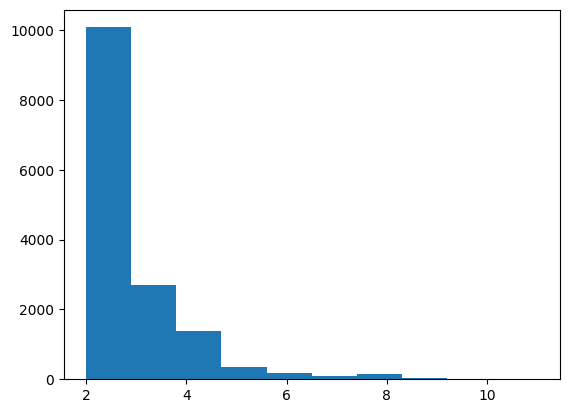

In [123]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

In [124]:
trans = [(k,g) for k, g in df.groupby(['Member_number', 'Date'])]
#plt.hist(dist)
transactions = [list(i[1]['itemDescription']) for i in trans]

df = pd.DataFrame (transactions)
df= df.fillna(0)

transs= df.values.tolist()
trans_stripped = [[item for item in tr if item] for tr in transs]
trans_stripped

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [125]:
rules = list(apriori(trans_stripped, min_support = 0.001, min_confidence = 0.1, min_lift = 1.2, min_length = 1))
len(rules), rules

(13,
 [RelationRecord(items=frozenset({'yogurt', 'chewing gum'}), support=0.001403461872619127, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chewing gum'}), items_add=frozenset({'yogurt'}), confidence=0.11666666666666667, lift=1.358508430609598)]),
  RelationRecord(items=frozenset({'detergent', 'yogurt'}), support=0.0010693042839002875, ordered_statistics=[OrderedStatistic(items_base=frozenset({'detergent'}), items_add=frozenset({'yogurt'}), confidence=0.12403100775193798, lift=1.4442614544686756)]),
  RelationRecord(items=frozenset({'flour', 'tropical fruit'}), support=0.0010693042839002875, ordered_statistics=[OrderedStatistic(items_base=frozenset({'flour'}), items_add=frozenset({'tropical fruit'}), confidence=0.10958904109589042, lift=1.6171408500175626)]),
  RelationRecord(items=frozenset({'herbs', 'yogurt'}), support=0.0011361358016440553, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herbs'}), items_add=frozenset({'yogurt'}), confidence=0.107594936708

In [126]:
rules_transformed = []
def print_rules(rules):
    for rule in rules:
        rule_det = {}
        print ('rule.items=', list(rule.items))
        rule_det['items']=rule.items
        print ('rule.support=',rule.support)
        rule_det['support']=rule.support

        for os in rule.ordered_statistics:
            rule_det['items_base']=os.items_base
            print ('\titems_base=', list(os.items_base))
            rule_det['items_add']=os.items_add
            print ('\tlifted_item =', list(os.items_add))
            rule_det['lift']=os.lift
            print ('\tlift=', os.lift)
            print ('\tconfidence (i.e. cond prob {} if {})='.format(list(os.items_add), list(os.items_base)), os.confidence)
            print ('\n')
        rules_transformed.append(rule_det)
print_rules(rules)

rule.items= ['yogurt', 'chewing gum']
rule.support= 0.001403461872619127
	items_base= ['chewing gum']
	lifted_item = ['yogurt']
	lift= 1.358508430609598
	confidence (i.e. cond prob ['yogurt'] if ['chewing gum'])= 0.11666666666666667


rule.items= ['detergent', 'yogurt']
rule.support= 0.0010693042839002875
	items_base= ['detergent']
	lifted_item = ['yogurt']
	lift= 1.4442614544686756
	confidence (i.e. cond prob ['yogurt'] if ['detergent'])= 0.12403100775193798


rule.items= ['flour', 'tropical fruit']
rule.support= 0.0010693042839002875
	items_base= ['flour']
	lifted_item = ['tropical fruit']
	lift= 1.6171408500175626
	confidence (i.e. cond prob ['tropical fruit'] if ['flour'])= 0.10958904109589042


rule.items= ['herbs', 'yogurt']
rule.support= 0.0011361358016440553
	items_base= ['herbs']
	lifted_item = ['yogurt']
	lift= 1.2528739595133722
	confidence (i.e. cond prob ['yogurt'] if ['herbs'])= 0.10759493670886075


rule.items= ['oil', 'soda']
rule.support= 0.001804450979081735
	items_ba

In [127]:
lift_top_10 = np.sort([x['lift'] for x in rules_transformed])[::-1][:10]
rules_top_10 = [rule for rule in rules_transformed if rule['lift'] in lift_top_10]
rules_top_10

[{'items': frozenset({'chewing gum', 'yogurt'}),
  'support': 0.001403461872619127,
  'items_base': frozenset({'chewing gum'}),
  'items_add': frozenset({'yogurt'}),
  'lift': 1.358508430609598},
 {'items': frozenset({'detergent', 'yogurt'}),
  'support': 0.0010693042839002875,
  'items_base': frozenset({'detergent'}),
  'items_add': frozenset({'yogurt'}),
  'lift': 1.4442614544686756},
 {'items': frozenset({'flour', 'tropical fruit'}),
  'support': 0.0010693042839002875,
  'items_base': frozenset({'flour'}),
  'items_add': frozenset({'tropical fruit'}),
  'lift': 1.6171408500175626},
 {'items': frozenset({'packaged fruit/vegetables', 'rolls/buns'}),
  'support': 0.0012029673193878234,
  'items_base': frozenset({'packaged fruit/vegetables'}),
  'items_add': frozenset({'rolls/buns'}),
  'lift': 1.2884205087972755},
 {'items': frozenset({'processed cheese', 'rolls/buns'}),
  'support': 0.0014702933903628951,
  'items_base': frozenset({'processed cheese'}),
  'items_add': frozenset({'roll